In [2]:
from platform import python_version

print(python_version())

3.8.5


In [ ]:
#!pip install tensorflow
#!pip install tensorflow-datasets
#!pip   uninstall -y torch

#!pip install torch==1.4.0 torchvision==0.5.0

#!pip install fastai==1.0.61

#conda install -c fastai fastai

#tf-gpu

In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate

bs = 64  #batch size: if your GPU is running out of memory, set a smaller batch size, i.e 16
sz = 224 #image size
PATH = './classification images/'

In [6]:
classes = []
for d in os.listdir(PATH):
    if os.path.isdir(os.path.join(PATH, d)) and not d.startswith('.'):
        classes.append(d) 
print ("There are ", len(classes), "classes:\n", classes) 

There are  3 classes:
 ['bad_mask', 'good_mask', 'no_mask']


In [7]:
for c in classes:
    print ("Class:", c)
    verify_images(os.path.join(PATH, c), delete=True);

Class: bad_mask


Class: good_mask


Class: no_mask


In [8]:
data  = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), size=sz, bs=bs, valid_pct=0.2).normalize(imagenet_stats)
print ("There are", len(data.train_ds), "training images and", len(data.valid_ds), "validation images." )

There are 5458 training images and 1364 validation images.


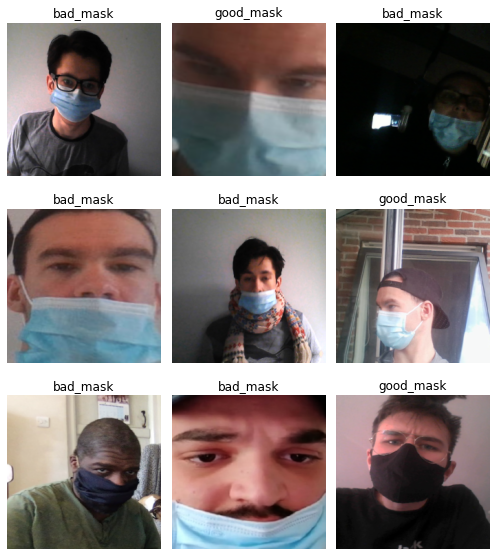

In [9]:
data.show_batch(rows=3, figsize=(7,8))

In [7]:
#learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [8]:
#learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.659033,0.298060,0.893040,06:08
1,0.387387,0.171808,0.934799,06:09
2,0.260488,0.128450,0.953846,06:17
3,0.199307,0.119940,0.952381,06:16


In [13]:
#learn.export(os.path.abspath('m_explort.pkl'))

In [5]:
learn = load_learner('./model/', 'm_explort.pkl')

In [9]:
interp = ClassificationInterpretation.from_learner(learn)

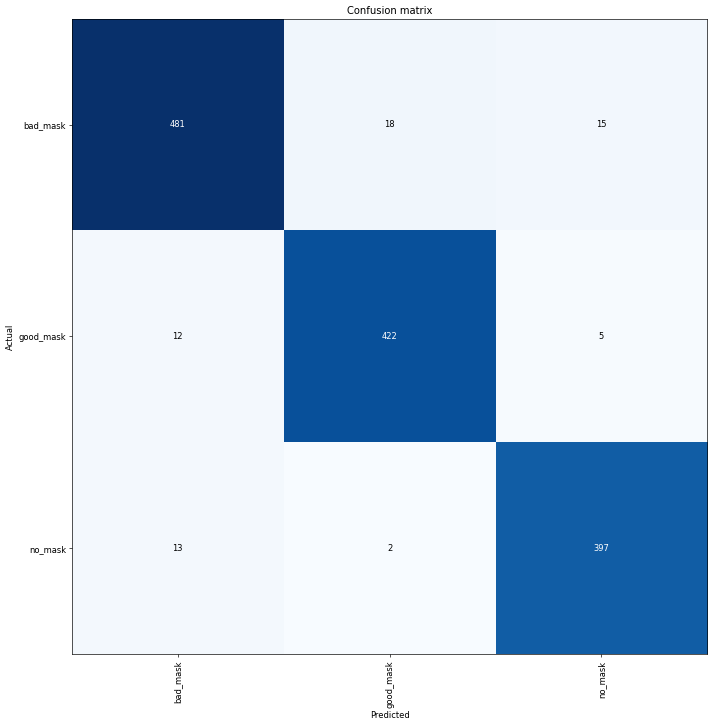

In [10]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

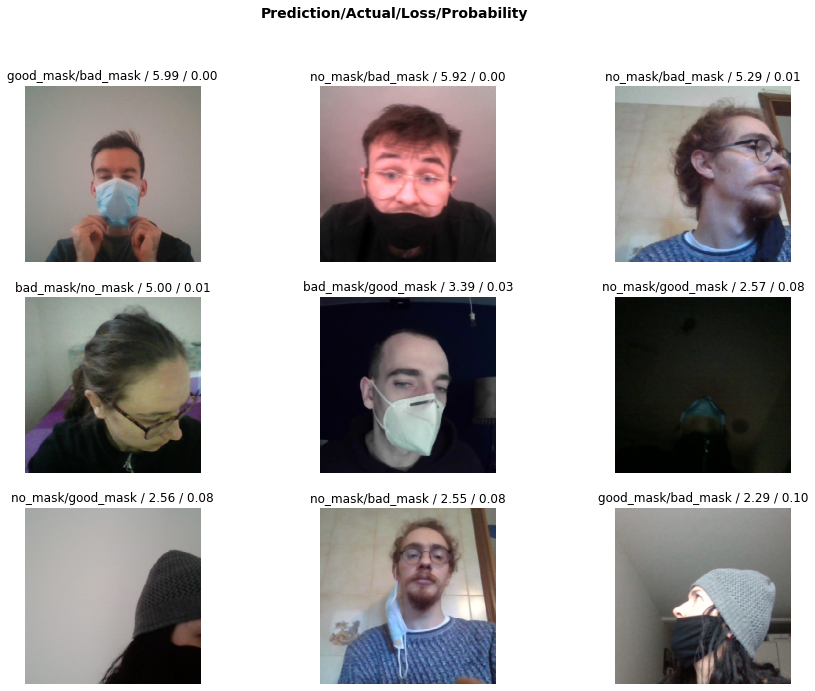

In [11]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=False)

It is a bad_mask
It is a good_mask
It is a good_mask
It is a no_mask
It is a bad_mask
It is a bad_mask
It is a good_mask


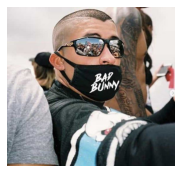

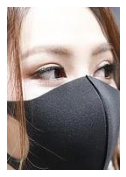

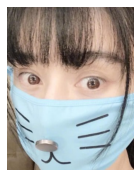

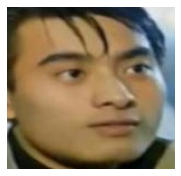

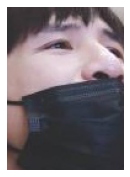

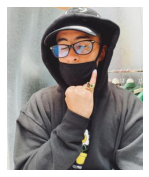

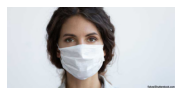

In [12]:
count = 0
path = './trial' #The path of your test image

for i in os.listdir(path):
    img = open_image(get_image_files(path)[count])
    pred_class,pred_idx,outputs = learn.predict(img)
    img.show()
    print ("It is a", pred_class)
    count += 1